# Exploratory Analysis of RAPTOR Metrics in the Modern NBA (1977-2023)

------

## Presented by: Christopher Baker, Jonathan Carmichael, Jack Hayes, Wipawadee Naiyakhun, and Uzma Sayyeda


### Importing data, merging datasets, and removing NaN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from scipy.stats import linregress
import plotly.express as px
%matplotlib inline

In [2]:
# import our two CSVs
latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

# merging both datasets
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30797,Omer Yurtseven,yurtsom01,2023,RS,MIA,177,83,2.486415,-7.487443,-5.001027,...,1.332271,-5.782120,-4.449850,0.241523,1.659495,-7.678176,-6.018681,5.109138,-4.382791,0.726346
30798,Cody Zeller,zelleco01,2023,PO,MIA,354,174,-3.408309,-1.285457,-4.693766,...,-3.123433,-2.253790,-5.377222,0.312978,-4.691477,-1.659638,-6.351115,3.038203,0.802259,3.840461
30799,Cody Zeller,zelleco01,2023,RS,MIA,447,217,-1.370539,-5.780102,-7.150641,...,-1.658070,-3.760831,-5.418901,0.311628,-1.382510,-5.605615,-6.988125,-1.018074,-4.713301,-5.731374
30800,Ivica Zubac,zubaciv01,2023,PO,LAC,274,130,-3.769316,8.511745,4.742429,...,-4.849337,5.794117,0.944780,0.534762,-3.282714,11.150790,7.868076,-4.475477,-5.323365,-9.798842


In [3]:
# removing null data
# raptor_box and raptor_onoff are only for 2013-onward

merged_df.fillna(0, inplace=True)
clean_df = merged_df
clean_df.isnull().sum()
clean_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,0.0,0.0,0.0,0.0,0.0,0.0
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,0.0,0.0,0.0,0.0,0.0,0.0
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,0.0,0.0,0.0,0.0,0.0,0.0
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,0.0,0.0,0.0,0.0,0.0,0.0
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,0.0,0.0,0.0,0.0,0.0,0.0


### Defining Functions

In [4]:
## bar plot

def bar_plot(x_axis, y_axis, ylabel, title, size):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color="#F94C10")
    ax.bar_label(bar_container, fmt='{:,.0f}')
    plt.xlabel("Player Names", weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 20 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [5]:
## linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

In [6]:
## Seaborn bar plot function

def sns_bar_plot(data,x,y,title,xlabel,ylabel):
    
    f, (ax) = plt.subplots(figsize=(15,7))
    sns.set_theme(style="white", context="notebook",font_scale=1.5)

    sns.barplot(x=x,
                y=y,
                data=data,
                palette="autumn",
                alpha=0.7)

    for i in ax.containers:
        ax.bar_label(i,fmt="%.5s")
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,weight="bold")
    ax.axhline(0,color="k",clip_on=False)
    sns.despine(bottom=True)
    plt.show()

In [7]:
## make plotly scatter plot function

def int_scatter(data,x,y,title,ylabel):
    fig = px.scatter(data,
                 x=x,
                 y=y,
                 color="player_name",
                 color_discrete_sequence=px.colors.sequential.YlOrRd,
                 size=y,
                 template="ggplot2",
                 title=title,
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="#F94C10",
                 labels={"x": "Total RAPTOR Scores","y": ylabel},
                 hover_data=['player_name'])
    fig.update_layout(xaxis_title="Total RAPTOR Scores",
                      yaxis_title=ylabel)
                 
                 
    fig.show()

### Averages of various features by team

In [8]:
total_players=clean_df.groupby("team")["player_name"].count()
raptor_total=clean_df.groupby("team")["raptor_total"].mean()
poss=clean_df.groupby("team")["poss"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()
pace_impact=clean_df.groupby("team")["pace_impact"].mean()
raptor_onoff_total=clean_df.groupby("team")["raptor_onoff_total"].mean()
avg_mp_team=clean_df.groupby("team")["mp"].mean()
avg_raptor_offense=clean_df.groupby("team")["raptor_offense"].mean()
avg_raptor_defense=clean_df.groupby("team")["raptor_defense"].mean()
avg_summary = pd.DataFrame({"Total Players": total_players,
          "Raptor Total": raptor_total,
          "Possessions": poss,
          "War Total": war_total,
          "Pace Impact": pace_impact,
          "Minutes Played":avg_mp_team,
          "Raptor On and Off Totals":raptor_onoff_total,
          "RAPTOR Offense": avg_raptor_offense,
          "RAPTOR Defense": avg_raptor_defense}).reset_index()
avg_summary.head()

,team,Total Players,Raptor Total,Possessions,War Total,Pace Impact,Minutes Played,Raptor On and Off Totals,RAPTOR Offense,RAPTOR Defense
0,ATL,1185,-1.570031,1642.004219,1.140147,0.263341,819.489451,0.018678,-1.187607,-0.382423
1,BOS,1222,-1.199087,1704.759411,1.448069,0.248033,838.174304,0.033699,-1.130326,-0.068761
2,BRK,340,-1.191441,1366.402941,0.843397,0.275703,666.041176,-0.316375,-1.077620,-0.113821
3,BUF,37,-2.715885,2382.189189,0.983682,0.180248,1068.513514,0.000000,-1.835151,-0.880735
4,CHA,380,-2.366248,1938.507895,0.952573,0.133151,975.000000,-0.145483,-1.909040,-0.457208


### Question 1: Do the amount of possessions per player greatly impact that player’s team's total RAPTOR ratings by season? Why or why not?

In [9]:
# defining a full list of players from both sets of data based on possessions and total RAPTOR scores

poss_raptor = clean_df.groupby(["player_name"])[["poss", "raptor_total"]].sum(numeric_only = None)
poss_raptor_df = pd.DataFrame(poss_raptor)

# reset index
poss_raptor_df = poss_raptor_df.reset_index()

# show
poss_raptor_df.head()

,player_name,poss,raptor_total
0,A.C. Green,81445,-5.311204
1,A.J. Bramlett,123,-9.820485
2,A.J. English,6393,-8.779331
3,A.J. Guyton,2362,-16.723745
4,A.J. Lawson,239,-29.105705


In [10]:
# setting dataframe to label top 20 players by possession total

by_poss = poss_raptor_df.groupby(["player_name"])[["raptor_total", "poss"]].sum().sort_values(by="poss", ascending=False)
by_poss = by_poss.reset_index()
by_poss = by_poss.head(20)

In [11]:
# setting dataframe to label top 20 players by RAPTOR total

by_raptor = poss_raptor_df.groupby(["player_name"])[["poss", "raptor_total"]].sum().sort_values(by="raptor_total", ascending=False)
by_raptor = by_raptor.reset_index()
by_raptor = by_raptor.head(20)

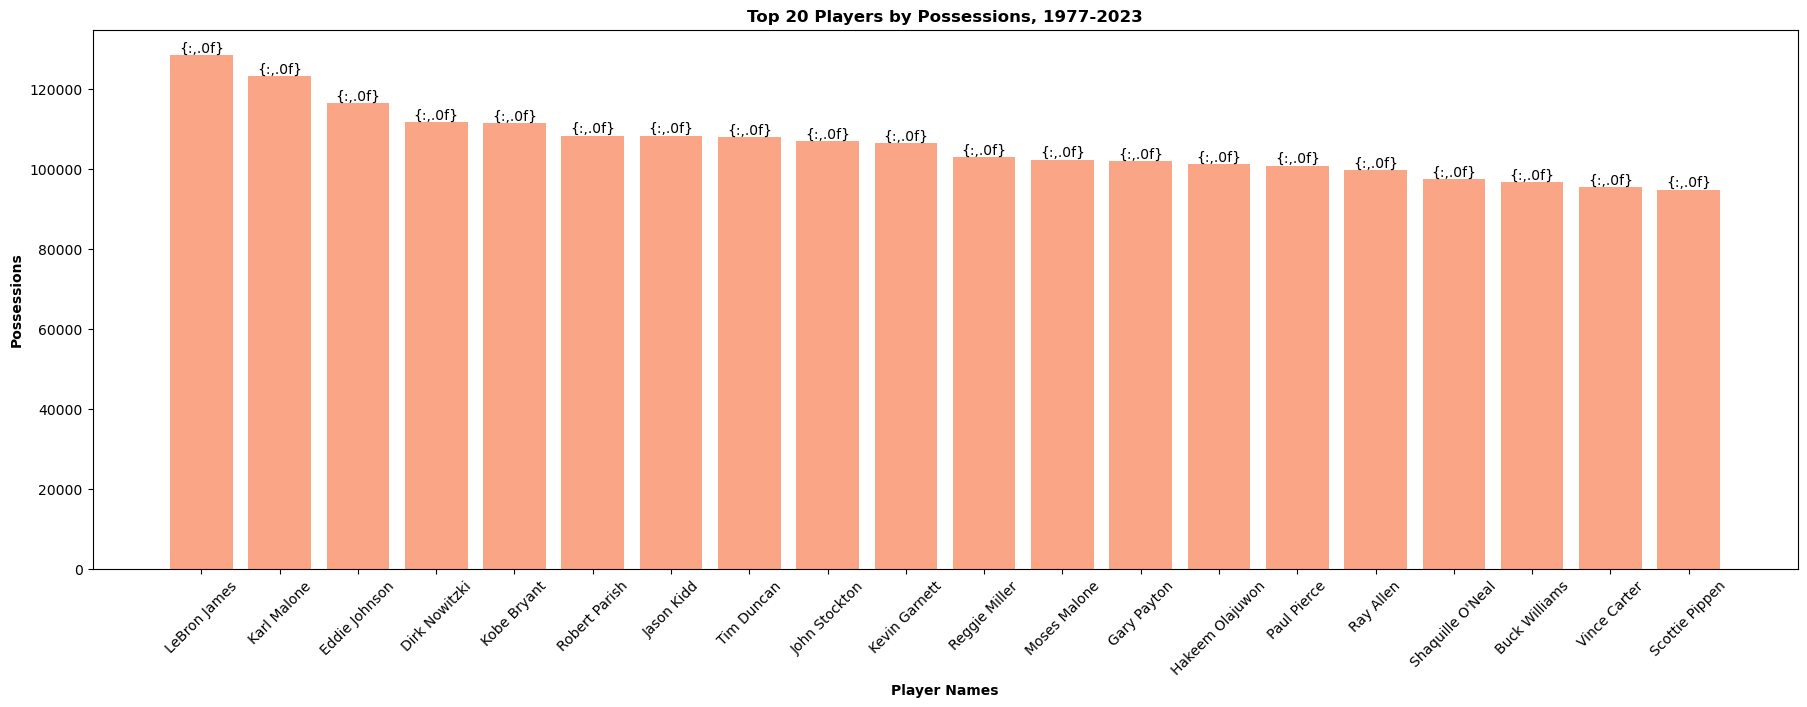

In [12]:
# Minutes played for top ten players

top_twenty_poss = poss_raptor_df[["player_name", "poss"]].\
sort_values(by="poss", ascending=False).head(20)

poss = top_twenty_poss["poss"]
player_names = top_twenty_poss["player_name"]

bar_plot(player_names, poss, "Possessions", "Players by Possessions, 1977-2023", (22,7))

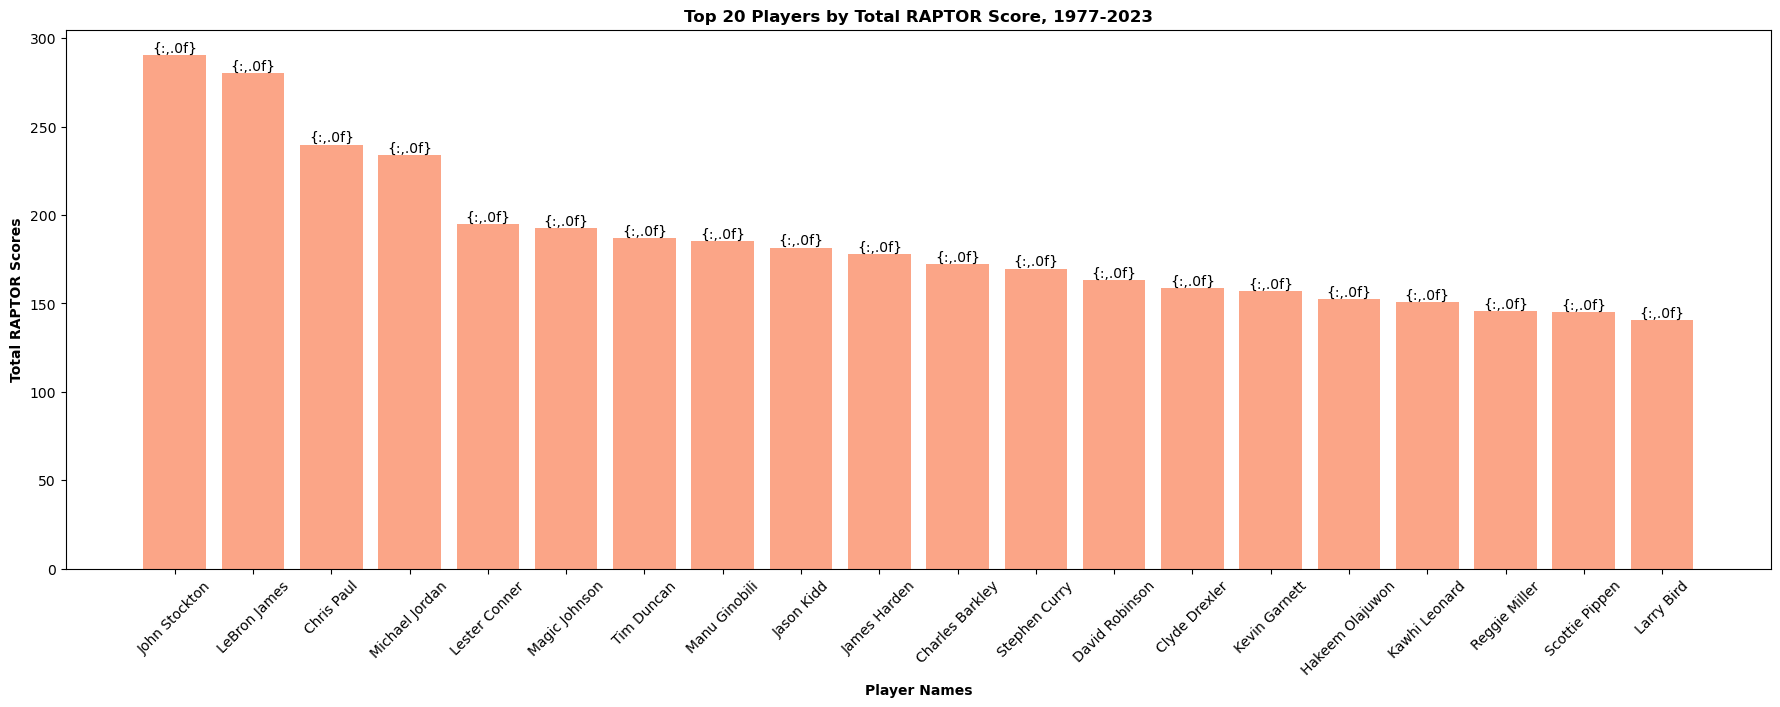

In [13]:
# graphing top players by RAPTOR total

top_twenty_raptor = poss_raptor_df[["player_name", "raptor_total"]].\
sort_values(by="raptor_total", ascending=False).head(20)

raptor = top_twenty_raptor["raptor_total"]
player_names = top_twenty_raptor["player_name"]

bar_plot(player_names, raptor, "Total RAPTOR Scores", "Players by Total RAPTOR Score, 1977-2023", (22,7))

In [14]:
# make a new dataframe to display by teams

total_players = clean_df.groupby("team")["player_name"].count()
raptor_total = clean_df.groupby("team")["raptor_total"].mean()
poss_total = clean_df.groupby("team")["poss"].mean()

team_poss_raptor = pd.DataFrame({"Total Players":total_players,
                                "Total RAPTOR Score":raptor_total,
                                "Total Possessions":poss_total})

team_poss_raptor.head()

,Total Players,Total RAPTOR Score,Total Possessions
team,,,
ATL,1185,-1.570031,1642.004219
BOS,1222,-1.199087,1704.759411
BRK,340,-1.191441,1366.402941
BUF,37,-2.715885,2382.189189
CHA,380,-2.366248,1938.507895


The r-value is: 0.19019525425278175


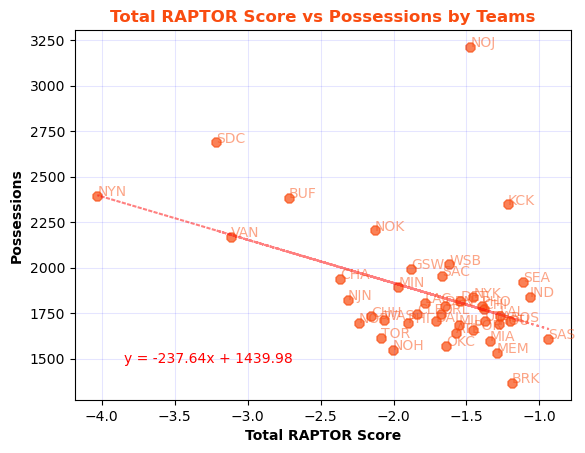

In [15]:
# linear regression for total RAPTOR score vs. total possessions

x_axis = avg_summary["Raptor Total"]
y_axis = avg_summary["Possessions"]
team_names = avg_summary["team"]

regression_plot(x_axis, y_axis, "Total RAPTOR Score", "Possessions", (-4,0.4), 0.1, 0.1)


## Question #2: Which team displayed the highest/lowest RAPTOR ratings across the 2022-23 season across all players? How does this data compare to their predictive PREDATOR model?

In [16]:
raptor_team = latest_df.groupby("team")["raptor_total"].sum()
predator_team = latest_df.groupby("team")["predator_total"].sum()
raptor_offense = latest_df.groupby("team")["raptor_offense"].sum()
raptor_defense = latest_df.groupby("team")["raptor_defense"].sum()
predator_offense = latest_df.groupby("team")["predator_offense"].sum() 
predator_defense = latest_df.groupby("team")["predator_defense"].sum()

In [17]:
raptor_team_df = pd.DataFrame({'Team': raptor_team.index, 'Raptor Total': raptor_team.values})
predator_team_df = pd.DataFrame({'Team': predator_team.index, 'Predator Total': predator_team.values})
raptor_offense_df = pd.DataFrame({'Team': raptor_offense.index, 'Raptor Offense': raptor_offense.values})
raptor_defense_df = pd.DataFrame({'Team': raptor_defense.index, 'Raptor Defense': raptor_defense.values})
predator_offense_df = pd.DataFrame({'Team': predator_offense.index, 'Predator Offense': predator_offense.values})
predator_defense_df = pd.DataFrame({'Team': predator_defense.index, 'Predator Defense': predator_defense.values})

In [18]:
merged_team_df = raptor_team_df.merge(predator_team_df, on='Team')
merged_team_df = merged_team_df.merge(raptor_offense_df, on='Team')
merged_team_df = merged_team_df.merge(raptor_defense_df, on='Team')
merged_team_df = merged_team_df.merge(predator_offense_df, on='Team')
merged_team_df = merged_team_df.merge(predator_defense_df, on='Team')

In [19]:
merged_team_df

,Team,Raptor Total,Predator Total,Raptor Offense,Raptor Defense,Predator Offense,Predator Defense
0,ATL,6.863266,1.840534,12.227000,-5.363734,32.460902,-30.620368
1,BOS,-3.631239,-32.914619,23.832656,-27.463894,8.436387,-41.351005
2,BRK,-104.256530,-107.573453,-133.162290,28.905760,-126.884156,19.310703
3,CHA,-40.304983,-48.506931,-36.423774,-3.881209,-38.691973,-9.814958
4,CHI,-4.001443,-23.328158,-13.925916,9.924473,-23.783919,0.455761
5,CLE,21.586014,7.253193,-59.079865,80.665879,-56.633074,63.886268
6,DAL,-19.037993,-44.479826,-24.163970,5.125977,-28.631482,-15.848343
7,DEN,-105.536612,-136.724707,-104.602962,-0.933650,-65.730517,-70.994191
8,DET,8.109134,1.923398,-18.916789,27.025922,-13.366766,15.290164
9,GSW,-41.409366,-56.603304,-55.236879,13.827513,-54.911473,-1.691831


In [20]:
raptor_team

team
ATL      6.863266
BOS     -3.631239
BRK   -104.256530
CHA    -40.304983
CHI     -4.001443
CLE     21.586014
DAL    -19.037993
DEN   -105.536612
DET      8.109134
GSW    -41.409366
HOU    -25.855366
IND    -41.146076
LAC   -123.042717
LAL    -36.723181
MEM    -49.820666
MIA    -27.866124
MIL    -89.752585
MIN   -142.634261
NOP     -1.766213
NYK    -55.816213
OKC     -5.849762
ORL    -28.365133
PHI   -103.574696
PHO    -25.941525
POR    -95.847440
SAC     13.747850
SAS    -63.389380
TOR     -0.267644
UTA    -41.202767
WAS    -34.146618
Name: raptor_total, dtype: float64

In [21]:
raptor_team.sort_values(ascending=False, inplace=True)
top_20_rteams=raptor_team.head(20)
top_20_rteams

team
CLE    21.586014
SAC    13.747850
DET     8.109134
ATL     6.863266
TOR    -0.267644
NOP    -1.766213
BOS    -3.631239
CHI    -4.001443
OKC    -5.849762
DAL   -19.037993
HOU   -25.855366
PHO   -25.941525
MIA   -27.866124
ORL   -28.365133
WAS   -34.146618
LAL   -36.723181
CHA   -40.304983
IND   -41.146076
UTA   -41.202767
GSW   -41.409366
Name: raptor_total, dtype: float64

In [22]:
import plotly.express as px

In [23]:
print(merged_team_df.iloc[5])

Team                      CLE
Raptor Total        21.586014
Predator Total       7.253193
Raptor Offense     -59.079865
Raptor Defense      80.665879
Predator Offense   -56.633074
Predator Defense    63.886268
Name: 5, dtype: object


In [24]:
#Individual Players
CLE_r_values = [-59.079, 80.666, -56.63, 63.88]
Theta_Values = ["Raptor Offense","Raptor Defense","Predator Offense","Predator Defense"]

In [25]:
fig1 = px.scatter_polar(merged_team_df, r=CLE_r_values, theta=Theta_Values)
fig2 = px.scatter_polar(merged_team_df, r="Raptor Offense", theta="Team",color="Team", title="Rapor Total")
fig3 = px.scatter_polar(merged_team_df, r="Raptor Defense", theta="Team",)
fig4 = px.scatter_polar(merged_team_df, r="Predator Offense", theta="Team",)
fig5 = px.scatter_polar(merged_team_df, r="Predator Defense", theta="Team",)

In [26]:
fig1.show(),fig2.show(),fig3.show(),fig4.show(), fig5.show()

(None, None, None, None, None)

In [27]:
predator_team.sort_values(ascending=False, inplace=True)
top_20_pteams=predator_team.head(20)
top_20_pteams

team
CLE     7.253193
DET     1.923398
ATL     1.840534
TOR    -0.433891
OKC   -12.516801
NOP   -19.570459
CHI   -23.328158
MIA   -26.657895
SAC   -29.649561
WAS   -30.037627
BOS   -32.914619
ORL   -37.681660
IND   -40.243325
PHO   -42.094667
NYK   -43.736561
DAL   -44.479826
LAL   -45.972005
CHA   -48.506931
HOU   -51.781301
UTA   -55.238352
Name: predator_total, dtype: float64

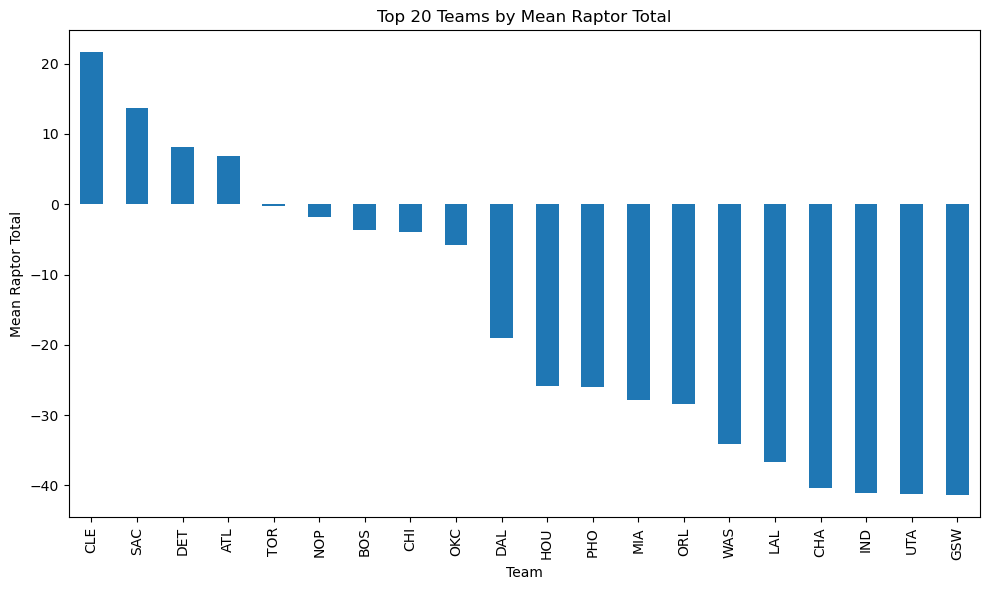

In [28]:
plt.figure(figsize=(10, 6))
top_20_rteams.plot(kind= "bar")
plt.title("Top 20 Teams by Mean Raptor Total")
plt.xlabel("Team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation= 90)
plt.tight_layout()

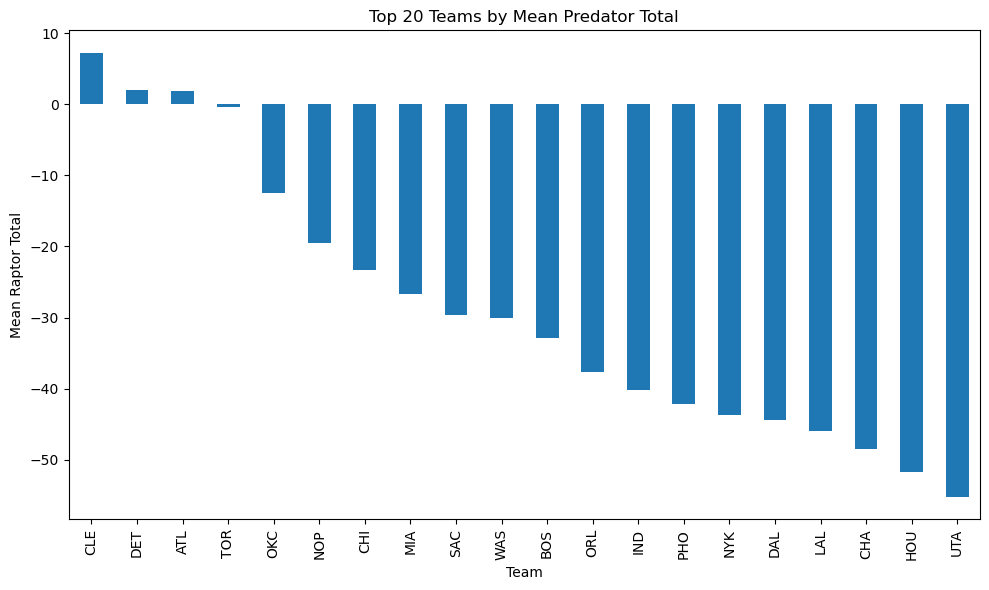

In [29]:
plt.figure(figsize=(10, 6))
top_20_pteams.plot(kind= "bar")
plt.title("Top 20 Teams by Mean Predator Total")
plt.xlabel("Team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation= 90)
plt.tight_layout()

In [30]:
bottom_raptor = latest_df.groupby("team")["raptor_total"].sum()
bottom_raptor.sort_values(ascending=True, inplace=True)
bottom_20_teams = bottom_raptor.head(20)
bottom_20_teams

team
MIN   -142.634261
LAC   -123.042717
DEN   -105.536612
BRK   -104.256530
PHI   -103.574696
POR    -95.847440
MIL    -89.752585
SAS    -63.389380
NYK    -55.816213
MEM    -49.820666
GSW    -41.409366
UTA    -41.202767
IND    -41.146076
CHA    -40.304983
LAL    -36.723181
WAS    -34.146618
ORL    -28.365133
MIA    -27.866124
PHO    -25.941525
HOU    -25.855366
Name: raptor_total, dtype: float64

In [31]:
bottom_predator = latest_df.groupby("team")["predator_total"].sum()
bottom_predator.sort_values(ascending=True, inplace=True)
bottom_20_pteams = bottom_predator.head(20)
bottom_20_pteams

team
LAC   -172.429430
DEN   -136.724707
MIL   -129.931122
MIN   -127.523721
BRK   -107.573453
POR    -93.448087
PHI    -84.773231
SAS    -82.141954
MEM    -77.494690
GSW    -56.603304
UTA    -55.238352
HOU    -51.781301
CHA    -48.506931
LAL    -45.972005
DAL    -44.479826
NYK    -43.736561
PHO    -42.094667
IND    -40.243325
ORL    -37.681660
BOS    -32.914619
Name: predator_total, dtype: float64

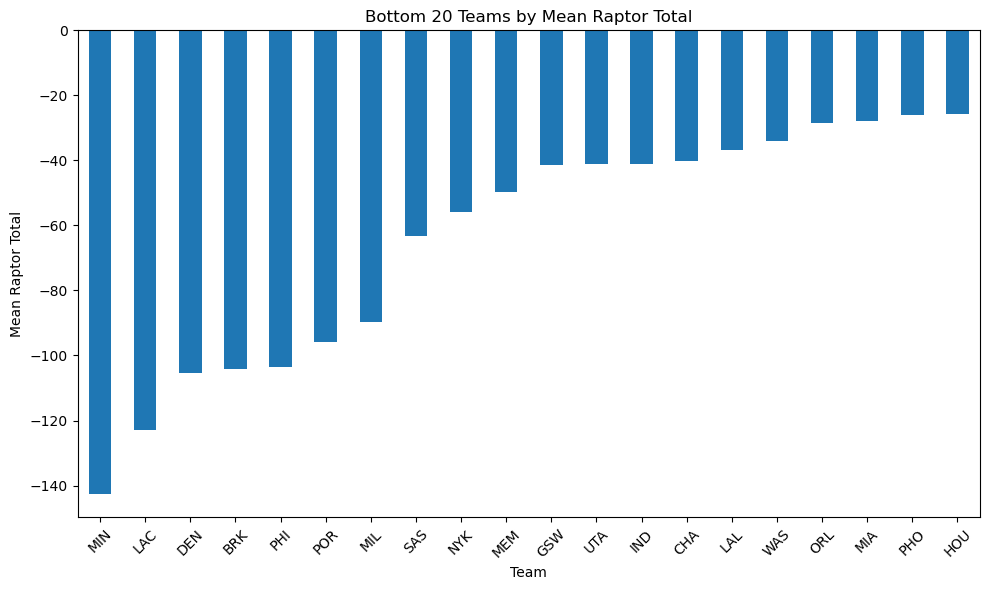

In [32]:
plt.figure(figsize=(10, 6))
bottom_20_teams.plot(kind= "bar")
plt.title("Bottom 20 Teams by Mean Raptor Total")
plt.xlabel("Team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation=45)
plt.tight_layout()

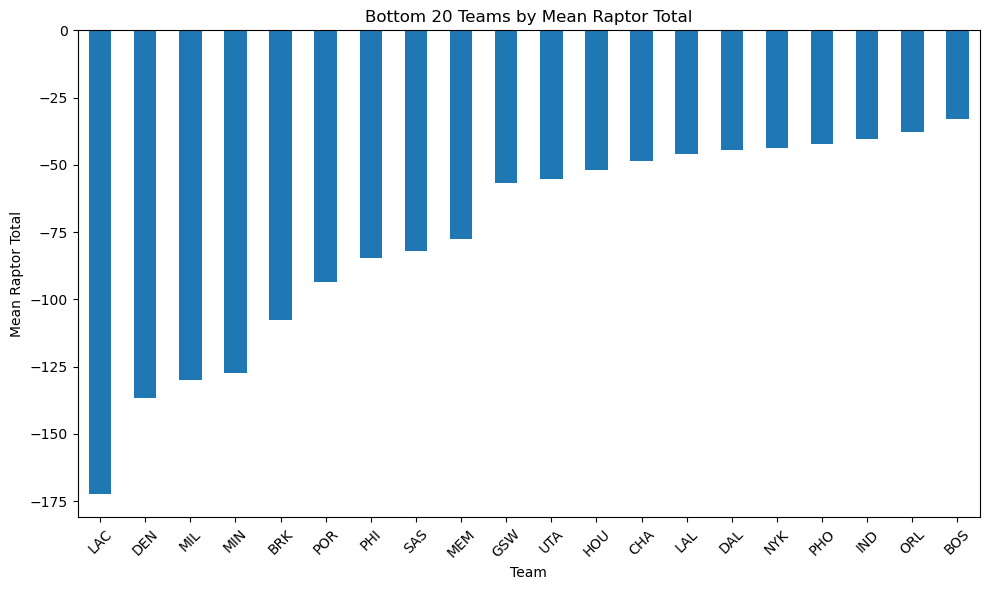

In [33]:
plt.figure(figsize=(10, 6))
bottom_20_pteams.plot(kind= "bar")
plt.title("Bottom 20 Teams by Mean Raptor Total")
plt.xlabel("Team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation=45)
plt.tight_layout()

### Question #3: How accurate are the overall results of predictive-RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

In [34]:
#Calculating Historical and Latest RAPTOR totals

In [35]:
his_team_raptor_totals = historical_df.groupby("team")["raptor_total"].sum().reset_index()
his_team_raptor_totals.head()

,team,raptor_total
0,ATL,-1867.349832
1,BOS,-1461.653071
2,BRK,-300.833420
3,BUF,-100.487762
4,CHA,-858.869307


In [36]:
lat_team_raptor_totals = latest_df.groupby("team")["raptor_total"].sum().reset_index()
lat_team_raptor_totals.head()

,team,raptor_total
0,ATL,6.863266
1,BOS,-3.631239
2,BRK,-104.256530
3,CHA,-40.304983
4,CHI,-4.001443


In [37]:
merged_raptor_totals = lat_team_raptor_totals.merge(his_team_raptor_totals, on="team", suffixes=("_latest", "_historical"))
merged_raptor_totals.head()

,team,raptor_total_latest,raptor_total_historical
0,ATL,6.863266,-1867.349832
1,BOS,-3.631239,-1461.653071
2,BRK,-104.256530,-300.833420
3,CHA,-40.304983,-858.869307
4,CHI,-4.001443,-1531.152283


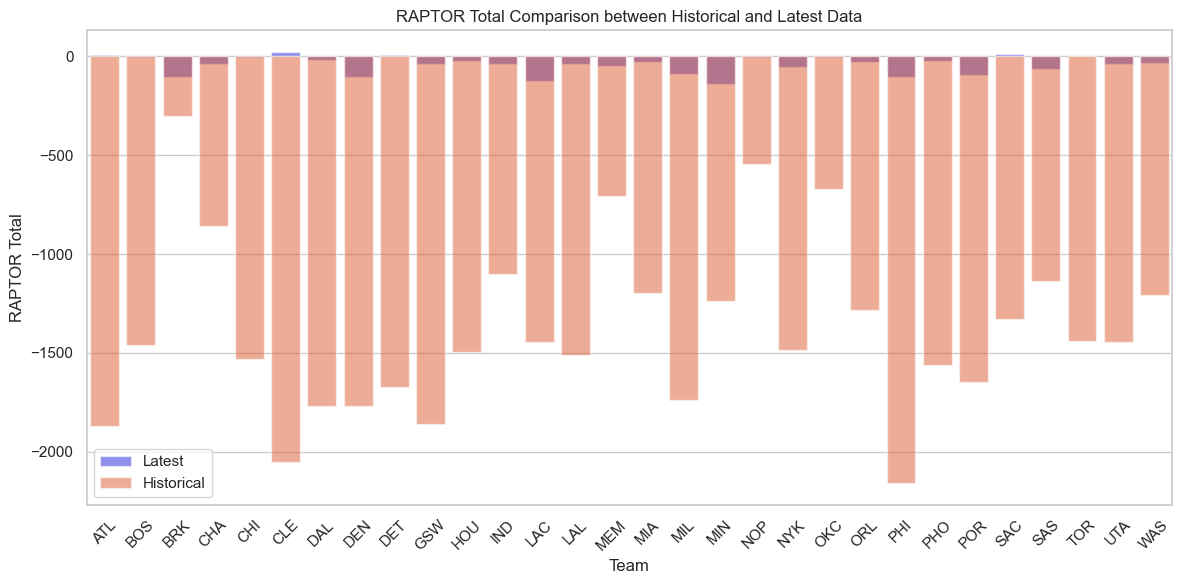

In [38]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_raptor_totals, x="team", y="raptor_total_latest", alpha = 0.5, color="blue", label="Latest")
sns.barplot(data=merged_raptor_totals, x="team", y="raptor_total_historical", alpha = 0.5, color="#F94C10", label="Historical")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("RAPTOR Total")
plt.title("RAPTOR Total Comparison between Historical and Latest Data")
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [39]:
#Calculating Historical and Latest War total

In [40]:
his_team_war_totals = historical_df.groupby("team")["war_total"].sum().reset_index()
his_team_war_totals.head()

,team,war_total
0,ATL,1319.084509
1,BOS,1712.529584
2,BRK,255.392848
3,BUF,36.396243
4,CHA,349.159085


In [41]:
lat_team_war_totals = latest_df.groupby("team")["war_total"].sum().reset_index()
lat_team_war_totals.head()

,team,war_total
0,ATL,31.989519
1,BOS,57.010582
2,BRK,31.362127
3,CHA,12.818726
4,CHI,31.283879


In [42]:
merged_war_totals = his_team_war_totals.merge(lat_team_war_totals, on="team", suffixes=("_historical", "_latest"))
merged_war_totals.head()

,team,war_total_historical,war_total_latest
0,ATL,1319.084509,31.989519
1,BOS,1712.529584,57.010582
2,BRK,255.392848,31.362127
3,CHA,349.159085,12.818726
4,CHI,1447.384776,31.283879


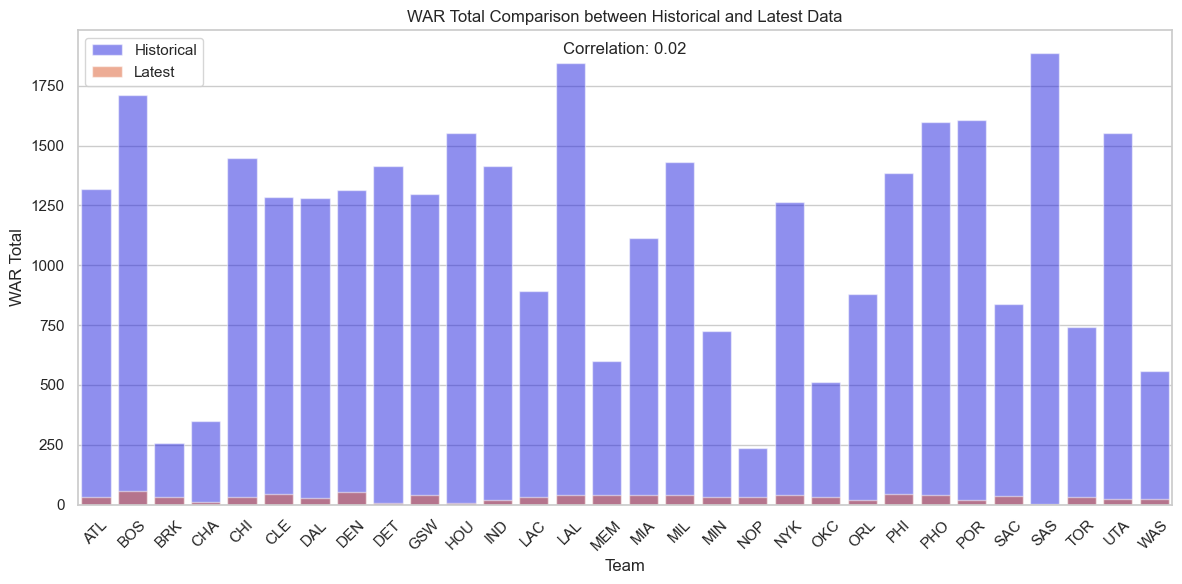

In [43]:
# Calculate the correlation coefficient
correlation = merged_war_totals["war_total_historical"].corr(merged_war_totals["war_total_latest"])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="war_total_historical", data=merged_war_totals, alpha = 0.5, color="blue", label="Historical")
sns.barplot(x="team", y="war_total_latest", data=merged_war_totals, alpha = 0.5, color="#F94C10", label="Latest")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("WAR Total")
plt.title("WAR Total Comparison between Historical and Latest Data")
plt.xticks(rotation=45)
plt.legend()

# Add the correlation coefficient as text on the plot
plt.text(0.5, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, ha="center")

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
#Finding the average/mean of the RAPTOR total

In [45]:
average_his_team_raptor_total = historical_df.groupby("team")["raptor_total"].mean().reset_index()
average_his_team_raptor_total.head()

,team,raptor_total
0,ATL,-1.616753
1,BOS,-1.228280
2,BRK,-0.999447
3,BUF,-2.715885
4,CHA,-2.379139


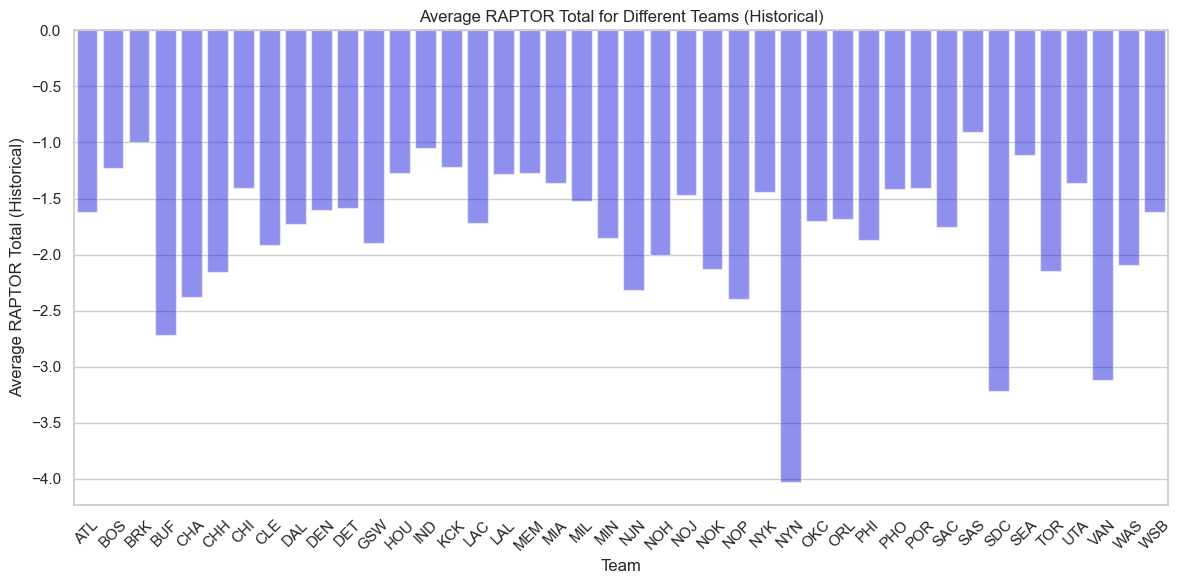

In [46]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="raptor_total", data=average_his_team_raptor_total, alpha = 0.5, color="blue")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Average RAPTOR Total (Historical)")
plt.title("Average RAPTOR Total for Different Teams (Historical)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
average_lat_team_raptor_total = latest_df.groupby("team")["raptor_total"].mean().reset_index()
average_lat_team_raptor_total.head()

,team,raptor_total
0,ATL,0.228776
1,BOS,-0.113476
2,BRK,-2.673244
3,CHA,-2.121315
4,CHI,-0.222302


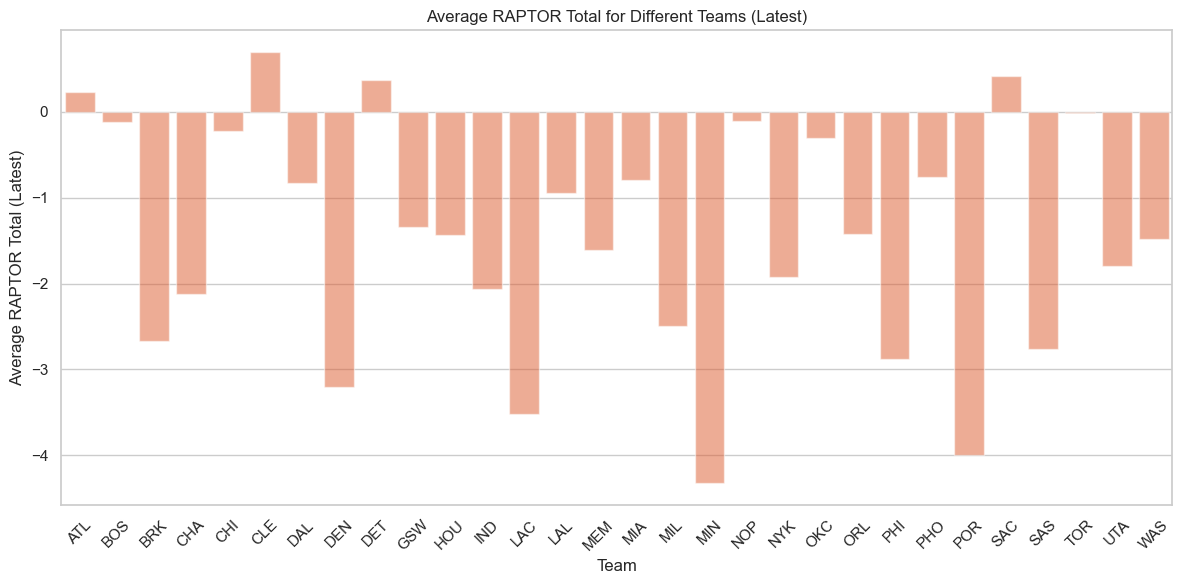

In [48]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="raptor_total", data=average_lat_team_raptor_total, alpha = 0.5, color="#F94C10")

# Add labels and title
plt.xlabel("Team")
plt.ylabel("Average RAPTOR Total (Latest)")
plt.title("Average RAPTOR Total for Different Teams (Latest)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
merged_raptor_totals = pd.merge(average_lat_team_raptor_total, average_his_team_raptor_total, on="team", suffixes=("_latest", "_historical"))
merged_raptor_totals.head()

,team,raptor_total_latest,raptor_total_historical
0,ATL,0.228776,-1.616753
1,BOS,-0.113476,-1.228280
2,BRK,-2.673244,-0.999447
3,CHA,-2.121315,-2.379139
4,CHI,-0.222302,-1.402154


In [50]:
#Historical VS Latest average RAPTOR total (bar graph)

c:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



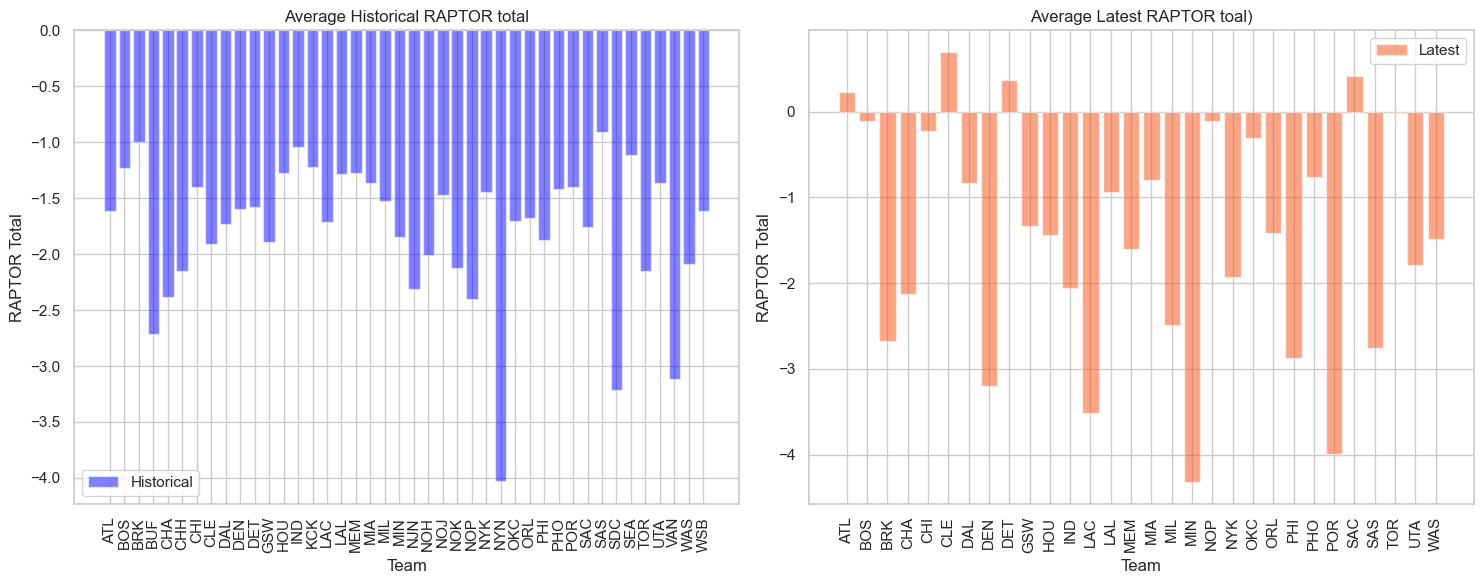

In [51]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot historical team RAPTOR means
axes[0].bar(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], alpha = 0.5, color = "blue", label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("RAPTOR Total")
axes[0].set_title("Average Historical RAPTOR total")
axes[0].set_xticklabels(average_his_team_raptor_total["team"], rotation=90)
axes[0].legend()

# Plot latest team RAPTOR means
axes[1].bar(average_lat_team_raptor_total["team"], average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("RAPTOR Total")
axes[1].set_title("Average Latest RAPTOR toal)")
axes[1].set_xticklabels(average_lat_team_raptor_total["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

In [52]:
#Historical VS Latest average RAPTOR total scatterplot

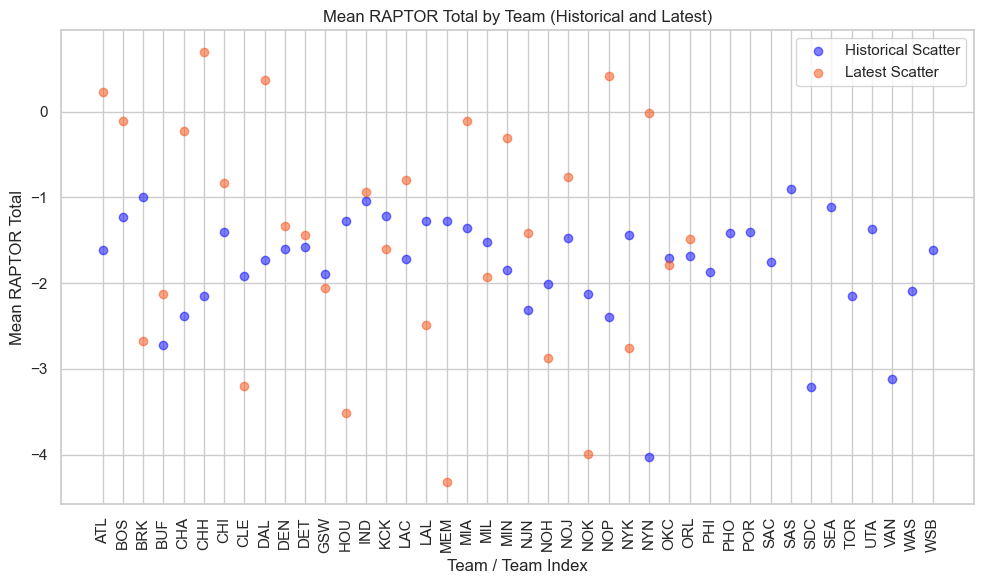

In [53]:
# Create a scatter plot with both historical and latest data
plt.figure(figsize=(10, 6))

# Scatter plot for historical team RAPTOR means
plt.scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], alpha = 0.5,color="blue", label="Historical Scatter")

# Scatter plot for latest team RAPTOR means
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest Scatter")

plt.xlabel("Team / Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical and Latest)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

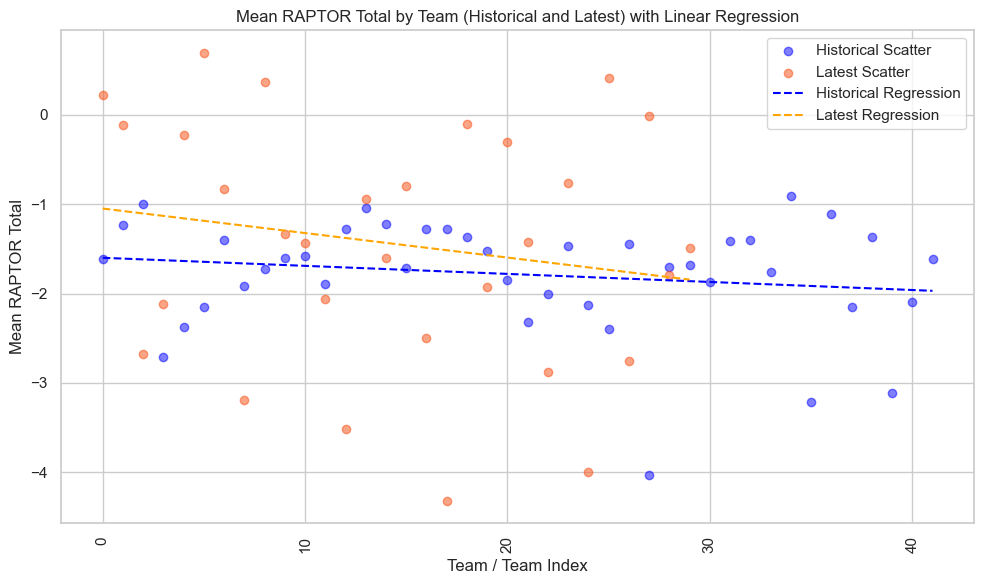

In [54]:
# Create a scatter plot with both historical and latest data
plt.figure(figsize=(10, 6))

# Scatter plot for historical team RAPTOR means
plt.scatter(average_his_team_raptor_total.index, average_his_team_raptor_total["raptor_total"], alpha = 0.5, color="blue", label="Historical Scatter")

# Scatter plot for latest team RAPTOR means
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], alpha = 0.5, color="#F94C10", label="Latest Scatter")

# Linear regression for historical data
hist_x = average_his_team_raptor_total.index.values
hist_y = average_his_team_raptor_total["raptor_total"].values
hist_slope, hist_intercept = np.polyfit(hist_x, hist_y, 1)
plt.plot(hist_x, hist_slope * hist_x + hist_intercept, color="blue", linestyle="--", label="Historical Regression")

# Linear regression for latest data
lat_x = average_lat_team_raptor_total.index.values
lat_y = average_lat_team_raptor_total["raptor_total"].values
lat_slope, lat_intercept = np.polyfit(lat_x, lat_y, 1)
plt.plot(lat_x, lat_slope * lat_x + lat_intercept, color="orange", linestyle="--", label="Latest Regression")

plt.xlabel("Team / Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical and Latest) with Linear Regression")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
#Finding the average/mean of the RAPTOR war total

In [56]:
average_his_team_war_totals = historical_df.groupby("team")["war_total"].mean().reset_index()
average_his_team_war_totals.head()

,team,war_total
0,ATL,1.142065
1,BOS,1.439100
2,BRK,0.848481
3,BUF,0.983682
4,CHA,0.967200


In [57]:
average_lat_team_war_totals = latest_df.groupby("team")["war_total"].mean().reset_index()
average_lat_team_war_totals.head()

,team,war_total
0,ATL,1.066317
1,BOS,1.781581
2,BRK,0.804157
3,CHA,0.674670
4,CHI,1.737993


In [58]:
#Historical VS Latest War totals

c:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



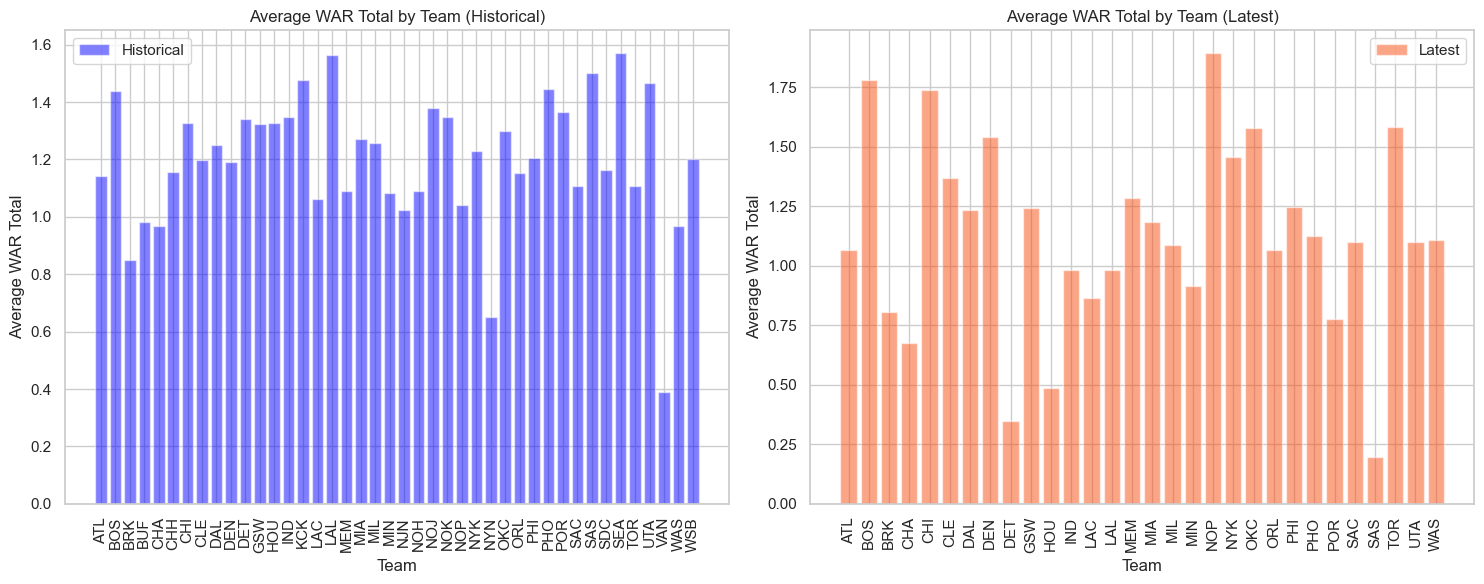

In [59]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average historical team WAR totals (bar plot)
axes[0].bar(average_his_team_war_totals["team"], average_his_team_war_totals["war_total"], alpha = 0.5, color = "blue", label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Average WAR Total")
axes[0].set_title("Average WAR Total by Team (Historical)")
axes[0].set_xticklabels(average_his_team_war_totals["team"], rotation=90)
axes[0].legend()

# Plot average latest team WAR totals (bar plot)
axes[1].bar(average_lat_team_war_totals["team"], average_lat_team_war_totals["war_total"], alpha =0.5, color="#F94C10", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("Average WAR Total")
axes[1].set_title("Average WAR Total by Team (Latest)")
axes[1].set_xticklabels(average_lat_team_war_totals["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

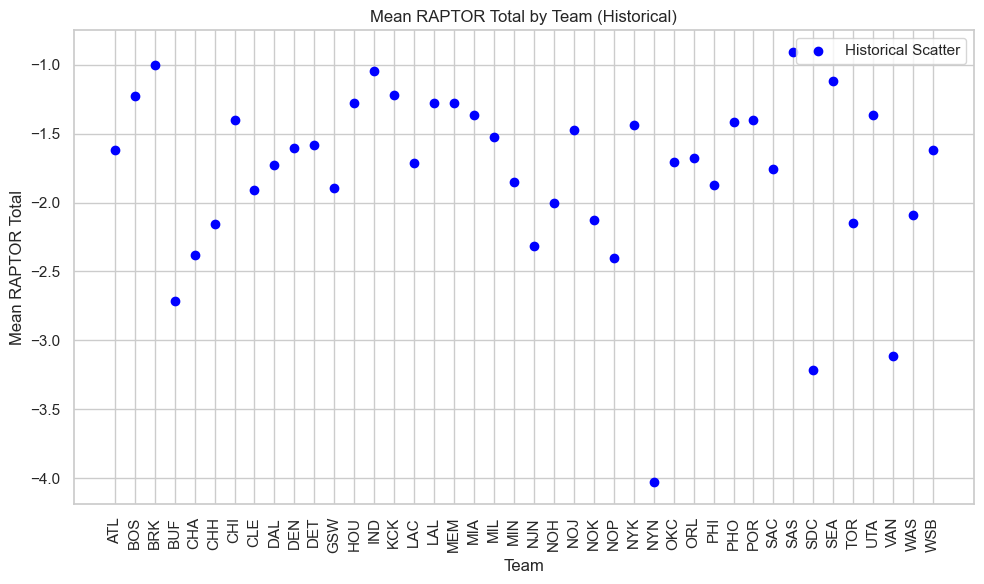

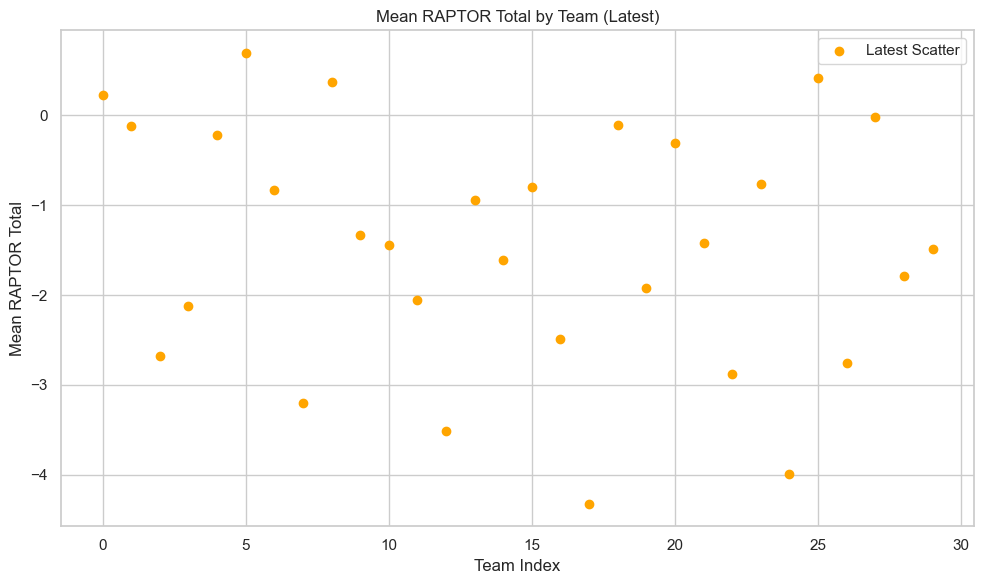

In [60]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], color="blue", label="Historical Scatter")
plt.xlabel("Team")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
# Create a scatter plot for latest team RAPTOR means
plt.figure(figsize=(10, 6))
plt.scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], color="orange", label="Latest Scatter")
plt.xlabel("Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Latest)")
plt.legend()
plt.tight_layout()
plt.show()

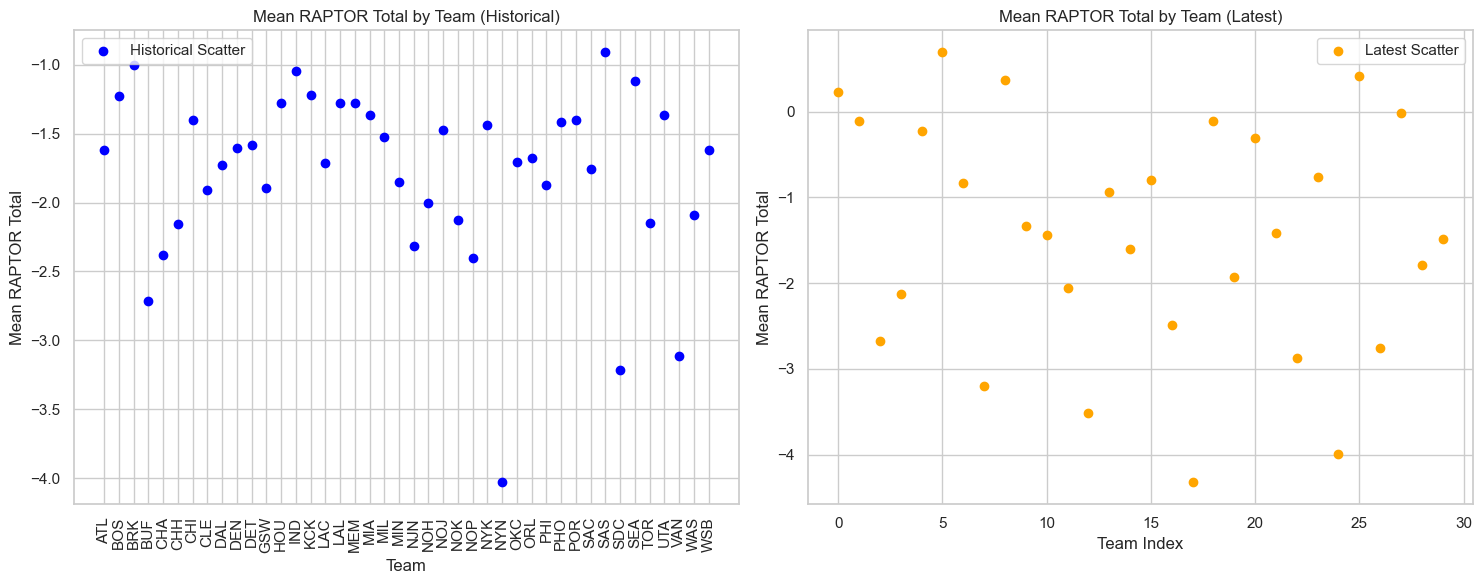

In [61]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for historical team RAPTOR means
axes[0].scatter(average_his_team_raptor_total["team"], average_his_team_raptor_total["raptor_total"], color="blue", label="Historical Scatter")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Mean RAPTOR Total")
axes[0].set_title("Mean RAPTOR Total by Team (Historical)")
axes[0].tick_params(axis="x", rotation=90)
axes[0].legend()

# Scatter plot for latest team RAPTOR means
axes[1].scatter(average_lat_team_raptor_total.index, average_lat_team_raptor_total["raptor_total"], color="orange", label="Latest Scatter")
axes[1].set_xlabel("Team Index")
axes[1].set_ylabel("Mean RAPTOR Total")
axes[1].set_title("Mean RAPTOR Total by Team (Latest)")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

### Question #4: Which players had the most minutes played and the greatest pace impact on their team compared to their total RAPTOR scores?

In [62]:
# Data wrangling
# Filter columns

df=clean_df[["player_name","mp","raptor_total","pace_impact"]]
df.head(2)

# Get the totals of minutes played,pace impact and raptor totals of each player.

total_mp=df.groupby("player_name")["mp"].sum()
total_pace_impact=df.groupby("player_name")["pace_impact"].sum()
total_raptor=df.groupby("player_name")["raptor_total"].sum()

# Make it into a Dataframe

total_mp_pace_raptor = pd.DataFrame({"Total_Minutes_Played": total_mp,
                             "Total_Pace_Impact": total_pace_impact,
                             "Total_RAPTOR_Scores": total_raptor})
total_mp_pace_raptor=total_mp_pace_raptor.reset_index()

# Display the Dataframe

total_mp_pace_raptor.head(2)

,player_name,Total_Minutes_Played,Total_Pace_Impact,Total_RAPTOR_Scores
0,A.C. Green,40671,-14.631130,-5.311204
1,A.J. Bramlett,61,0.527413,-9.820485


#### Top 10 Impact per Player

In [67]:
# Slice and sort dataframe

# top_10_pace=total_mp_pace_raptor[["player_name","Total_Pace_Impact"]].\
#                                     sort_values(by="Total_Pace_Impact",ascending=False)
# top_10_pace=top_10_pace.head(20)

# # Define variables

# x=top_10_pace["player_name"]
# y=top_10_pace["Total_Pace_Impact"]

# # plot bar plot

# sns_bar_plot(top_10_pace,
#              x,y,
#              "Top 10 Pace Impact per Player",
#              "Player Names",
#              "Total Pace Impact")
pace=total_mp_pace_raptor.sort_values(by="Total_RAPTOR_Scores",ascending=False)
pace_20=pace.head(20)

px.bar_polar(pace_20, r="Total_RAPTOR_Scores", theta="player_name", color="Total_Pace_Impact",
                   color_continuous_scale=px.colors.sequential.YlOrRd, template="ggplot2",
                   title="Top 20 Total Pace Impact per Player")

#### Top 10 Minutes Played per Player

In [69]:
# Slicing amd sorting dataframe

# top_mp=total_mp_pace_raptor[["player_name","Total_Minutes_Played"]].\
#                             sort_values(by="Total_Minutes_Played",ascending=False)
# top_10_mp=top_mp.head(20)

tmp=total_mp_pace_raptor.sort_values(by="Total_Minutes_Played",ascending=False)
mp_20=tmp.head(20)
# Define variables

# x=top_10_mp["player_name"]
# y=top_10_mp["Total_Minutes_Played"]

# # plot bar plot

# sns_bar_plot(top_10_mp,
#              x,y,
#              "Top 10 Minutes Played per Player",
#              "Player Names",
#              "Total Minutes Played")

px.bar_polar(mp_20, r="Total_RAPTOR_Scores", theta="player_name", color="Total_Minutes_Played",
                   color_continuous_scale=px.colors.sequential.YlOrRd, template="ggplot2",
                   title="Top 20 Minutes Played per Player")

#### Top Ten RAPTOR scores per Player

In [ ]:
# Slice and sort dataframe

# top_10_raptors=total_mp_pace_raptor[["player_name","Total_RAPTOR_Scores"]].\
#                                     sort_values(by="Total_RAPTOR_Scores",ascending=False)
# top_10_raptors=top_10_raptors.head(10)

# # Define variables

# x=top_10_raptors["player_name"]
# y=top_10_raptors["Total_RAPTOR_Scores"]

# # plot bar plot

# sns_bar_plot(top_10_raptors,
#              x,y,
#              "Top 10 RAPTOR Scores per Player",
#              "Player Names",
#              "Total RAPTOR Scores")

#### **Minutes Played vs. RAPTOR Scores for top 20 players**

In [ ]:
# # Slice and sort dataframe

# top_20_mp=total_mp_pace_raptor.sort_values(by="Total_Minutes_Played",ascending=False)
# top_20_mp=top_20_mp.head(20)

# # Define variables

# x=top_20_mp["Total_RAPTOR_Scores"]
# y=top_20_mp["Total_Minutes_Played"]

# # plot bar plot

# int_scatter(top_20_mp,
#             x,y,
#             "RAPTOR Scores vs Total Minutes Played",
#             "Total Minutes Played")

#### Pace Impact vs RAPTOR Scores for top 20 Players

In [ ]:
# # Slice and sort dataframe

# top_20_pace=total_mp_pace_raptor.sort_values(by="Total_Pace_Impact",ascending=False)
# top_20_pace=top_20_pace.head(20)

# # Define variables

# x=top_20_pace["Total_RAPTOR_Scores"]
# y=top_20_pace["Total_Pace_Impact"]

# # plot bar plot

# int_scatter(top_20_pace,
#             x,y,
#             "RAPTOR Scores vs Total Pace Impact",
#             "Total Pace Impact")

In [ ]:
multi=total_mp_pace_raptor.sort_values(by="Total_RAPTOR_Scores",ascending=False)
multi

fig=px.scatter(multi, x="Total_RAPTOR_Scores",
           y="Total_Minutes_Played",
           color="Total_Pace_Impact",
           size="Total_Minutes_Played",
           color_continuous_scale=px.colors.sequential.YlOrRd,
           hover_data=["player_name"],
           title="RAPTOR Scores and in relation with Minutes played and Total Pace Impact",
           template="ggplot2",
           trendline="ols",
           trendline_scope="overall",
           trendline_color_override="#F94C10",
           opacity=0.5
                                      
           )
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,),
    xaxis_title="Total RAPTOR Scores",
    yaxis_title="Total Minutes Played"
    )

# fig.data = fig.data[::-1]

fig.show()

In [ ]:
# fig = px.scatter(top_20_pace,
#                  x="Total_RAPTOR_Scores",
#                  y="Total_Pace_Impact",
#                  color="player_name",
#                  color_discrete_sequence=px.colors.sequential.OrRd,
#                  size='Total_Pace_Impact',
#                  template="plotly_white",
#                  trendline="ols", trendline_options=dict(log_x=True),
#                  title="Pace Impact vs. RAPTOR Scores",
#                  hover_data=['player_name'])

# fig.update_layout(
#                  xaxis_title="Total RAPTOR Scores",
#                  yaxis_title="Total Pace Impact")
# fig.show()

### Question #5: How do these statistics line up by player in relation to the top players/teams (MVPs) of the 2022-2023 season?

In [ ]:
# read csv file
stats_2023 = pd.read_csv("latest_RAPTOR_by_team.csv")

stats_2023.head()

# fill all null values with 0 
clean_df_2023 = stats_2023.fillna(0)

clean_df_2023

clean_df_2023.describe()

# Linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

    # bar plot

def bar_plot(x_axis, y_axis, ylabel, title, size,):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color="darkblue")
    ax.bar_label(bar_container, fmt='{:,.0f}')
    plt.xlabel("Player Names", weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 10 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

## Top / MVP Players    

# Filter players based on the given conditions
player_filter = clean_df_2023[(clean_df_2023['poss'] > 2000) & (clean_df_2023['mp'] > 1350)]

# Group by player_name and aggregate the statistics
grouped_players = (player_filter.groupby('player_name')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the player score
grouped_players['player_score'] = (grouped_players['raptor_total'] + 
                                   grouped_players['raptor_box_total'] + 
                                   grouped_players['raptor_offense'] + 
                                   grouped_players['raptor_defense'] + 
                                   grouped_players['war_total'])

# Sort players based on the player score and reset the index
sorted_players = (grouped_players.sort_values(by='player_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_players.index += 1

# Display top 10 players based on the player score
top_players = sorted_players[['player_name', 'player_score']].head(10)
top_players

## Top players - Bar plot 
player_score = top_players["player_score"]
player_names = top_players["player_name"]

bar_plot(player_names, player_score, "Player Score", "Players, 2022-2023", (22,7))

## Player Raptor total 

# Sort players based on "raptor_total" and reset the index
player_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
player_raptor_total.index += 1

# Display top 10 players based on "raptor_total"
top_player_raptor_total = player_raptor_total[['player_name', 'raptor_total']].head(10)
top_player_raptor_total

## Player Raptor box total 
# Sort players based on "raptor_box_total" and reset the index
raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_box_total.index += 1

# Display top 10 players based on "raptor_box_total"
top_raptor_box_players = raptor_box_total[['player_name', 'raptor_box_total']].head(10)
top_raptor_box_players

## Player Raptor offense 

# Sort players based on "raptor_offense" and reset the index
raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_offense.index += 1

# Display top 10 players based on "raptor_offense"
top_raptor_offense_players = raptor_offense[['player_name', 'raptor_offense']].head(10)
top_raptor_offense_players

## Player Raptor defense 

# Sort players based on "raptor_defense" and reset the index
raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_defense.index += 1

# Display top 10 players based on "raptor_defense"
top_raptor_defense_players = raptor_defense[['player_name', 'raptor_defense']].head(10)
top_raptor_defense_players

## Player War total 

# Sort players based on "war_total" and reset the index
war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
war_total.index += 1

# Display top 10 players based on "war_total"
top_war_total_players = war_total[['player_name', 'war_total']].head(10)
top_war_total_players

## Top teams
# Filter teams based on the given conditions
team_filter = clean_df_2023[(clean_df_2023['poss'] > 1500) & (clean_df_2023['mp'] > 1250)]

# Group by team and aggregate the statistics
grouped_teams = (team_filter.groupby('team')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the team score
grouped_teams['team_score'] = (grouped_teams['raptor_total'] + 
                                   grouped_teams['raptor_box_total'] + 
                                   grouped_teams['raptor_offense'] + 
                                   grouped_teams['raptor_defense'] + 
                                   grouped_teams['war_total'])

# Sort teams based on the teams score and reset the index
sorted_teams = (grouped_teams.sort_values(by='team_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_teams.index += 1

# Display the top 10 teams based on the player score
top_teams = sorted_teams[['team', 'team_score']].head(10)
top_teams

## Top team - Bar plot 

team_score = top_teams["team_score"]
teams = top_teams["team"]

bar_plot(teams, team_score, "Team Score", "Teams, 2022-2023", (22,7))

## Top Teams - Raptor total

# Sort team based on "raptor_total" and reset the index
team_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_total.index += 1

# Display the top 10 teams based on "raptor_total"
top_team_raptor_total = team_raptor_total[['team', 'raptor_total']].head(10)
top_team_raptor_total

## Team Raptor box total

# Sort teams based on "raptor_box_total" and reset the index
team_raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_box_total.index += 1

# Display top 10 teams based on "raptor_box_total"
top_team_raptor_box_total = team_raptor_box_total[['team', 'raptor_box_total']].head(10)
top_team_raptor_box_total

## Team Raptor offense

# Sort teams based on "raptor_offense" and reset the index
team_raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_offense.index += 1

# Display top 10 teams based on "raptor_offense"
top_team_raptor_offense = team_raptor_offense[['team', 'raptor_offense']].head(10)
top_team_raptor_offense

## Top Teams - Raptor Defense 

# Sort teams based on "raptor_defense" and reset the index
team_raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_defense.index += 1

# Display top 10 teams based on "raptor_defense"
top_team_raptor_defense = team_raptor_defense[['team', 'raptor_defense']].head(10)
top_team_raptor_defense

## Top Teams - War Total 
# Sort teams based on "war_total" and reset the index
team_war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_war_total.index += 1

# Display top 10 teams based on "war_total"
top_team_war_total = team_war_total[['team', 'war_total']].head(10)
top_team_war_total

## Linear regression
# Scatter plot with top players & top teams data
plt.figure(figsize=(10, 6))

# Scatter plot for players top scores
plt.scatter(top_players.index, top_players["player_score"], alpha = 0.5, color="blue", label="Player Scatter")

# Scatter plot for teams top scores
plt.scatter(top_teams.index, top_teams["team_score"], alpha = 0.5, color="red", label="Team Scatter")

# Linear regression for top players
hist_x = top_players.index.values
hist_y = top_players["player_score"].values
hist_slope, hist_intercept = np.polyfit(hist_x, hist_y, 1)
plt.plot(hist_x, hist_slope * hist_x + hist_intercept, color="blue", linestyle="--", label="Player Regression")

# Linear regression for top team
lat_x = top_teams.index.values
lat_y = top_teams["team_score"].values
lat_slope, lat_intercept = np.polyfit(lat_x, lat_y, 1)
plt.plot(lat_x, lat_slope * lat_x + lat_intercept, color="red", linestyle="--", label="Team Regression")

plt.xlabel("Team / Player Index")
plt.ylabel("Team / Player Scores")
plt.title("Team / Player Scores with Linear Regression")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## Correlation

corr_df=clean_df_2023[['poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total', 
       'war_playoffs', 'predator_offense', 'predator_defense', 'predator_total',
       'raptor_box_total']].corr()


plt.figure(figsize=(10,10))
sns.set_context("notebook",font_scale=0.8)

sns.heatmap(corr_df, annot=True, cmap="Reds")
plt.show()

### Evaluations and Results: What are some key differences between those who had a final RAPTOR score that was either positive versus negative?

## **Analysis**

### Correaltion Matrix

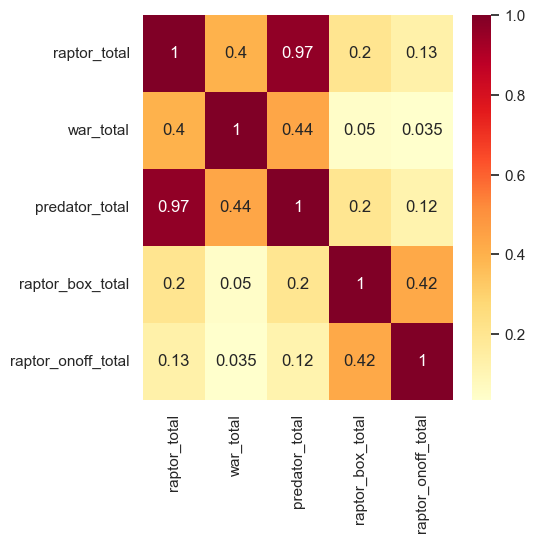

In [ ]:
# Filter the clean dataframe for desired features
# Needs more filtering

df_mx=clean_df[[ 'raptor_total', 'war_total','predator_total','raptor_box_total','raptor_onoff_total']].corr()

# plot a heatmap 

plt.figure(figsize=(5,5))
sns.set_context("notebook",font_scale=1)

sns.heatmap(df_mx, annot=True, cmap="YlOrRd")
plt.show()

### Team vs Season vs Raptor Scores

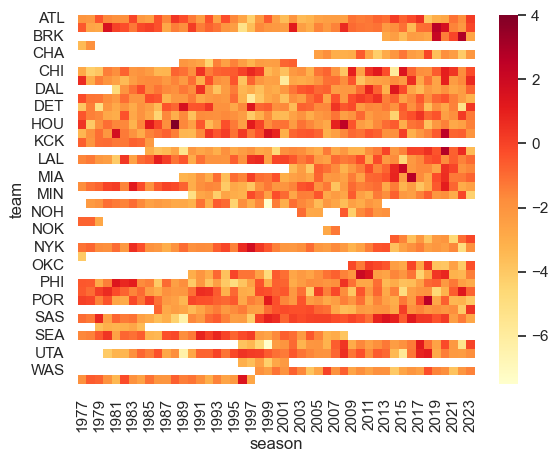

In [ ]:
# Filter the data
cluster_plot=clean_df[["season","team","raptor_total"]]

# Plot a pivot table and assign varibale name

cluster_plot=cluster_plot.pivot_table(index="team",columns="season",values="raptor_total")

# Plot a heatmap
# #F94C10
sns.set_context("notebook")
sns.heatmap(cluster_plot, cmap="YlOrRd")
plt.show()

In [ ]:
# can't figure out why we have missing data here.

cluster_plot.head()

### BOXPLOTS